# data prepping

In [2]:
# %pip install pandas tensorflow numpy scikit-learn
# %pip install matplotlib

In [3]:
import pandas as pd
import numpy as np
import math

In [ ]:
df = pd.read_csv("data/creditcard.csv")

# delete unwanted data
df = df.drop(["Time"], axis=1)
df = df.dropna(how='any',axis=0)
df

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
284802,-11.881118,10.071785,-9.834783,-2.066656,-5.364473,-2.606837,-4.918215,7.305334,1.914428,4.356170,...,0.213454,0.111864,1.014480,-0.509348,1.436807,0.250034,0.943651,0.823731,0.77,0
284803,-0.732789,-0.055080,2.035030,-0.738589,0.868229,1.058415,0.024330,0.294869,0.584800,-0.975926,...,0.214205,0.924384,0.012463,-1.016226,-0.606624,-0.395255,0.068472,-0.053527,24.79,0
284804,1.919565,-0.301254,-3.249640,-0.557828,2.630515,3.031260,-0.296827,0.708417,0.432454,-0.484782,...,0.232045,0.578229,-0.037501,0.640134,0.265745,-0.087371,0.004455,-0.026561,67.88,0
284805,-0.240440,0.530483,0.702510,0.689799,-0.377961,0.623708,-0.686180,0.679145,0.392087,-0.399126,...,0.265245,0.800049,-0.163298,0.123205,-0.569159,0.546668,0.108821,0.104533,10.00,0


In [5]:
# # replace categorical data with discrete whole numbers
# column_keys = df.columns.values
# categorical_column_keys = []
# categorical_unique_values = {}

# for i, dt in enumerate(df.dtypes):
#     if dt.name == "object":
#         categorical_column_keys.append(df.columns.values[i])

# for i in categorical_column_keys:
#     unique = df[i].unique()
#     categorical_unique_values[i] = unique
#     df[i].replace(unique, np.arange(0, len(df[i].unique()), 1, dtype=int), inplace=True)

# categorical_unique_values

In [6]:
X_normal = df[df.values[:, -1] == 0].values
X_anomaly = df[df.values[:, -1] == 1].values

from sklearn.model_selection import train_test_split
X_train, X_test = train_test_split(X_normal, test_size=0.2, random_state=42)
X_test = np.concatenate((X_test, X_anomaly))

y_train = X_train[:, -1]
y_test = X_test[:, -1]
X_train = X_train[:, :-1]
X_test = X_test[:, :-1]

print(f"anomaly ratio: {len(X_anomaly)/len(df.values)}")
print(f"anomaly ratio in test set: {len(X_anomaly)/len(X_test)}")

anomaly ratio: 0.001727485630620034
anomaly ratio in test set: 0.008578153604742393


0.0017 of all examples are anomalous -> skewed dataset

In [7]:
print(y_train.shape, X_train.shape, y_test.shape, X_test.shape)

(227452,) (227452, 29) (57355,) (57355, 29)


In [8]:
# normalize features
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler().set_output(transform="default")
scaled_X_train = scaler.fit_transform(X_train)
scaled_X_test = scaler.fit_transform(X_test)

# visualization

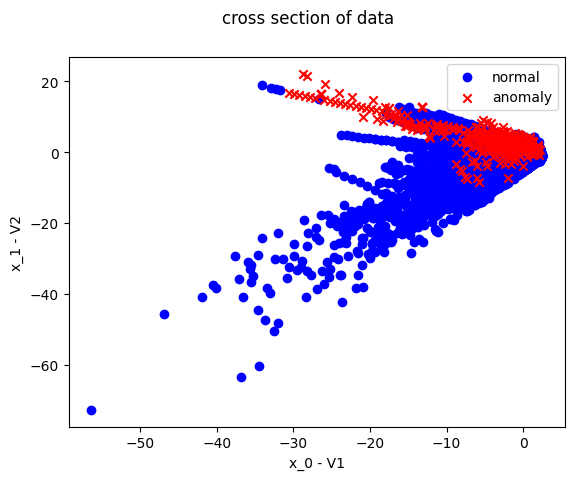

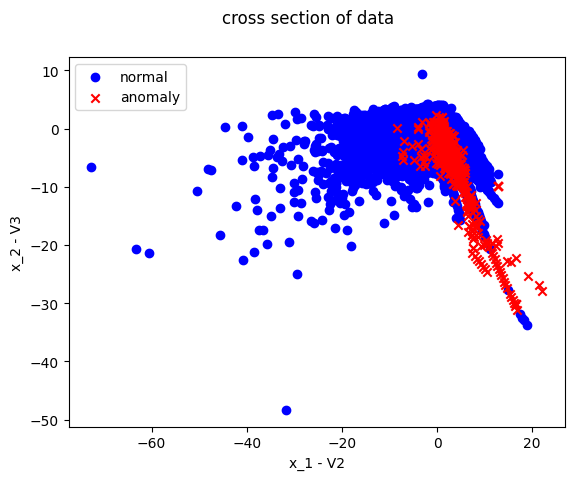

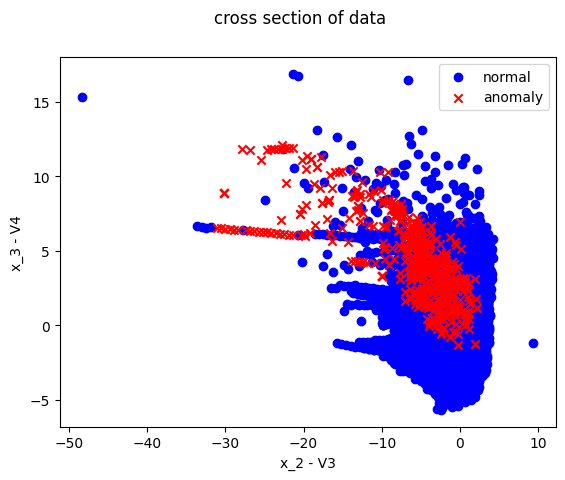

In [9]:
import matplotlib.pyplot as plt

def visualize(i1, i2):
    X1 = X_normal[:, i1]
    X2 = X_normal[:, i2]
    X1A = X_anomaly[:, i1]
    X2A = X_anomaly[:, i2]

    # visualization
    fig, axs = plt.subplots(1, 1)
    fig.suptitle(f'cross section of data')
    points1 = axs.scatter(X1, X2, c="b", marker="o")
    points1.set_label('normal')
    points2 = axs.scatter(X1A, X2A, c="r", marker="x")
    points2.set_label('anomaly')
    axs.legend()
    axs.set(xlabel=f'x_{i1} - {df.columns.values[i1]}', ylabel=f'x_{i2} - {df.columns.values[i2]}')

visualize(0, 1)
visualize(1, 2)
visualize(2, 3)

this is not very useful because the training data is PCA'd

# training appoach 1: anomaly detection - EllipticEnvelope

(although the data is not very Gaussian distributed, it's worth a shot)

this is the worst performance i have ever seen

# training appoach 2: anomaly detection - isolation forests

In [11]:
from sklearn.ensemble import IsolationForest

models_Forest = []
for conta in np.arange(0.05, 0.3, 0.05):
    models_Forest.append(IsolationForest(n_estimators=100, # number of forests
                            contamination=conta,
                            max_samples=2**12,
                            random_state=42).fit(X_train))

In [12]:
from sklearn.metrics import confusion_matrix

for i, model in enumerate(models_Forest):
    print(f"(contamination - {(i+1)/20}):")
    y_test_pred = model.predict(X_test)
    tn, fp, fn, tp = confusion_matrix(y_true=y_test, y_pred=np.where(y_test_pred==1, 1, 0)).ravel()
    print(f"tn: {tn}, fp: {fp}, fn: {fn}, tp: {tp}")
    print(f"precision: {tp/(fp+tp)}, recall: {tp/(fn+tp)}")


(contamination - 0.05):
tn: 2891, fp: 53972, fn: 432, tp: 60
precision: 0.001110453064850459, recall: 0.12195121951219512
(contamination - 0.1):
tn: 5679, fp: 51184, fn: 442, tp: 50
precision: 0.0009759144318226178, recall: 0.1016260162601626
(contamination - 0.15):
tn: 8462, fp: 48401, fn: 451, tp: 41
precision: 0.0008463729821229512, recall: 0.08333333333333333
(contamination - 0.2):
tn: 11402, fp: 45461, fn: 456, tp: 36
precision: 0.000791260962261248, recall: 0.07317073170731707
(contamination - 0.25):
tn: 14217, fp: 42646, fn: 462, tp: 30
precision: 0.0007029712250445215, recall: 0.06097560975609756


recall is more important than precision, but even with that justification, this model is terrible

# training appoach 3: classification

In [13]:
# new input data because this is supervised learning now
X_normal = df[df.values[:, -1] == 0].values
X_anomaly = df[df.values[:, -1] == 1].values

X_train, X_test = train_test_split(X_normal, test_size=0.2, random_state=42)
X_train_anomaly, X_test_anomaly = train_test_split(X_anomaly, test_size=0.2, random_state=42)
X_train = np.concatenate((X_train, X_train_anomaly))
X_test = np.concatenate((X_test, X_test_anomaly))

y_train = X_train[:, -1]
y_test = X_test[:, -1]
X_train = X_train[:, :-1]
X_test = X_test[:, :-1]

print(f"anomaly ratio: {len(X_anomaly)/len(df.values)}")

# normalize features
scaler = StandardScaler().set_output(transform="default")
scaled_X_train = scaler.fit_transform(X_train)
scaled_X_test = scaler.fit_transform(X_test)

anomaly ratio: 0.001727485630620034


In [14]:
import tensorflow as tf

model = tf.keras.Sequential([
    tf.keras.layers.Dense(units=16, activation="relu"),
    tf.keras.layers.Dense(units=16, activation="relu"),
    tf.keras.layers.Dense(units=1, activation="sigmoid"),
])

model.compile(loss=tf.keras.losses.BinaryCrossentropy(), 
              metrics=[
                  tf.keras.metrics.BinaryAccuracy(threshold=0.5),
                  tf.keras.metrics.TruePositives(name='tp'),
                  tf.keras.metrics.FalsePositives(name='fp'),
                  tf.keras.metrics.TrueNegatives(name='tn'),
                  tf.keras.metrics.FalseNegatives(name='fn'),
                  tf.keras.metrics.Precision(name='precision'),
                  tf.keras.metrics.Recall(name='recall')
              ],
              optimizer=tf.keras.optimizers.Adam(learning_rate=0.001))

model.fit(scaled_X_train, y_train, epochs=5)

Epoch 1/10
7121/7121 ━━━━━━━━━━━━━━━━━━━━ 31s 4ms/step - binary_accuracy: 0.9936 - fn: 91.4232 - fp: 192.9614 - loss: 0.0340 - precision: 0.3088 - recall: 0.4481 - tn: 113577.2109 - tp: 106.3899
Epoch 2/10
7121/7121 ━━━━━━━━━━━━━━━━━━━━ 27s 4ms/step - binary_accuracy: 0.9994 - fn: 47.1495 - fp: 23.2838 - loss: 0.0035 - precision: 0.8553 - recall: 0.7465 - tn: 113748.6016 - tp: 148.9506
Epoch 3/10
7121/7121 ━━━━━━━━━━━━━━━━━━━━ 26s 4ms/step - binary_accuracy: 0.9995 - fn: 38.1589 - fp: 26.3363 - loss: 0.0029 - precision: 0.8315 - recall: 0.7965 - tn: 113749.0938 - tp: 154.4013
Epoch 4/10
7121/7121 ━━━━━━━━━━━━━━━━━━━━ 27s 4ms/step - binary_accuracy: 0.9995 - fn: 37.1757 - fp: 20.4400 - loss: 0.0023 - precision: 0.8764 - recall: 0.8219 - tn: 113752.9219 - tp: 157.4527
Epoch 5/10
7121/7121 ━━━━━━━━━━━━━━━━━━━━ 28s 4ms/step - binary_accuracy: 0.9994 - fn: 43.4690 - fp: 24.6578 - loss: 0.0027 - precision: 0.8432 - recall: 0.7750 - tn: 113751.4219 - tp: 148.4398
Epoch 6/10
7121/7121 ━━━━━━━━

In [ ]:
met = model.evaluate(scaled_X_train, y_train, return_dict=True)
met

7121/7121 ━━━━━━━━━━━━━━━━━━━━ 62s 9ms/step - binary_accuracy: 0.9999 - fn: 0.0828 - fp: 16.9146 - loss: 5.1678e-04 - precision: 0.0016 - recall: 0.0018 - tn: 113950.6016 - tp: 0.3853         
{'loss': 0.001963644754141569, 'compile_metrics': 0.9995216131210327}


In [20]:
met = model.evaluate(scaled_X_test, y_test, return_dict=True)
met

1781/1781 ━━━━━━━━━━━━━━━━━━━━ 12s 7ms/step - binary_accuracy: 0.9998 - fn: 0.0550 - fp: 5.2447 - loss: 5.8303e-04 - precision: 0.0022 - recall: 0.0021 - tn: 28522.4824 - tp: 0.1661             


{'binary_accuracy': 0.9993504285812378,
 'fn': 24.0,
 'fp': 13.0,
 'loss': 0.002772403182461858,
 'precision': 0.8522727489471436,
 'recall': 0.7575757503509521,
 'tn': 56850.0,
 'tp': 75.0}

76% recall, pretty good<br>
classification might be more suitable for fraud detection (at least on this dataset)